# Analysis of Life Satisfication & GDP per capita

**Training & Running a Linear Model using `Scikit-Learn`**

* This notebook demonstrates a **`model-based machine learning`** approach using a linear regression model to predict life satisfaction based on GDP per capita. 
* Source : [Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition](https://www.amazon.ca/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)

### **Linear Model**

**Equation. A simple linear model**

$\text{life\_satisfaction} = \theta_0 + \theta_1 \times \text{GDP\_per\_capita}$

* Construct a mathematical model (linear regression) to represent the relationship between the input feature (GDP per capita) and the target variable (life satisfaction).
* Train the model by minimizing the *cost function*, which measures the distance between the predicted and actual values.
* Apply the model to make predictions on new, unseen cases.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [3]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [4]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


### **Data Cleaning and Prepare**

This function prepares and cleans the datasets for GDP per capita and Life Satisfaction by merging and filtering the relevant information from the `OECD Better Life Index` dataset and the `GDP per capita` dataset.


In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

* Construct the **feature matrix x**, which will be used as the input for the machine learning model.
* Construct the **target matrix y**, which will be used as the output for the machine learning model.

In [6]:
# prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

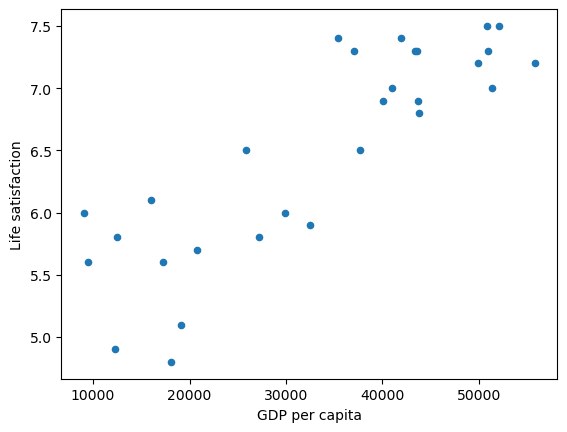

In [7]:
# visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

### **Residual Analysis**

* **Residuals vs. Fitted Values**: To check for randomness and detect patterns (e.g., non-linearity or heteroscedasticity) in residuals, validating the linearity and constant variance assumptions.
* **Histogram/QQ Plot of Residuals**: To assess whether residuals follow a normal distribution, ensuring that the residuals are random.

In [9]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [11]:
# train the model
model.fit(x, y)

LinearRegression()

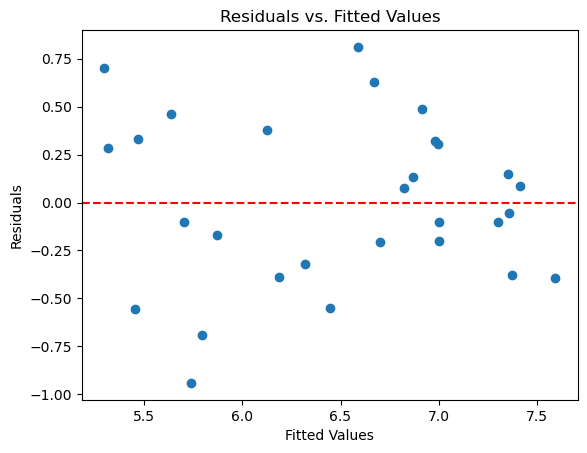

In [12]:
# calculate residuals
residuals = y - model.predict(x)

plt.scatter(model.predict(x), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#### **Findings** 

* **Residuals vs. Fitted Values plot** can be used to verify the suitability of model, as the residuals appear to be **randomly distributed** without any noticeable patterns (such as funnel-shaped or parabolic structures). This indicates that the assumptions of the model are <font color = 'blue'>**reasonable**</font>, therefore, we can keep using linear model to do the predictive analysis.

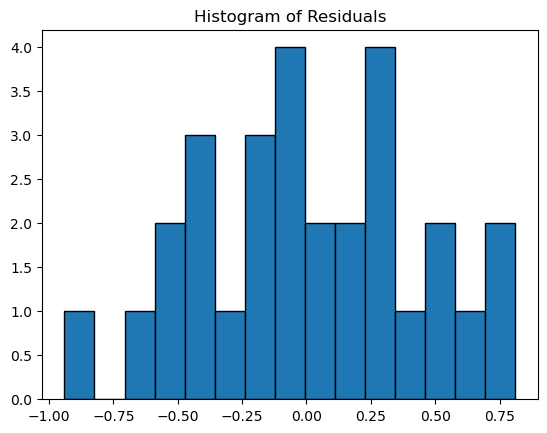

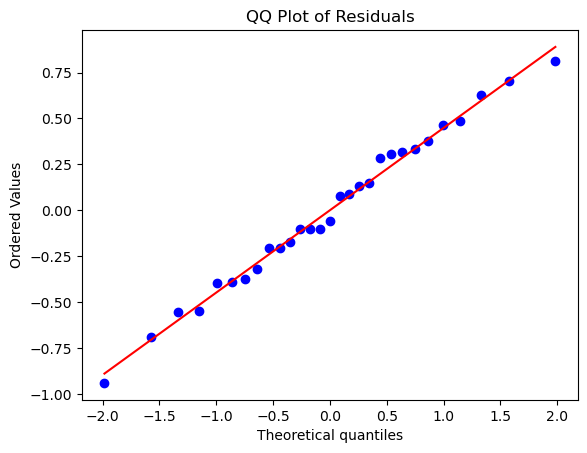

In [13]:
import scipy.stats as stats

# Histogram
plt.hist(residuals, bins=15, edgecolor='black')
plt.title("Histogram of Residuals")
plt.show()

# QQ Plot
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

#### **Findings** 

* **Histogram of Residuals** :
  1. Shape of Distribution : The residuals may approximately follow a normal distribution but with some slight irregularities. However, slight irregularities is common to be observed when working on small datasets.
  2. Concentration Around Zero : Most residuals are centered around zero, indicating that the model’s predictions are generally accurate on average.

The residuals are fairly symmetric and mostly centered around zero, which **supports the assumption of <font color = 'blue'>randomness</font> and <font color = 'blue'>normality</font> in residuals**.

* **QQ Plot of Residuals** :
  1. Alignment with the Line : Most of the points lie close to the red diagonal line, indicating that the residuals closely follow a normal distribution.

The residuals exhibit a pattern that is largely consistent with normality, **supporting the assumption of <font color = 'blue'>normality</font> in the regression model**.

### **Hypothesis Testing**

Based on the results of the QQ Plot of Residuals, Histogram of Residuals, and Residuals vs. Fitted Values, the model assumptions (**normality, randomness, linear relationship**) are generally satisfied. We can proceed to the next step: Hypothesis Testing.

In [14]:
import statsmodels.api as sm

# Add a constant to the model (intercept term)
x_with_constant = sm.add_constant(x)

# Fit the regression model using statsmodels
model_sm = sm.OLS(y, x_with_constant).fit()

# Print the summary of the model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     74.67
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.95e-09
Time:                        18:50:37   Log-Likelihood:                -16.345
No. Observations:                  29   AIC:                             36.69
Df Residuals:                      27   BIC:                             39.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8531      0.207     23.481      0.0

#### **Findings** 

* $H0$: The model has no explanatory power.
* $H1$: The model has explanatory power.

Confidence Level: 95%

1. The overall significance of the model is very high, and we reject the null hypothesis H_0 (**F-statistic p-value is 2.95e-09**, which is nearly zero).
2. The independent variable x1 has a significant impact on y, and we reject the null hypothesis H_0 (**P>|t| is 0.000**, which is less than 0.05).
3. **$R^2 = 0.734$**, indicating that the variables in the model explain 73.4% of the variation in satisfaction levels, demonstrating high explanatory power.

Based on the findings above, we <font color = 'blue'>**reject the null hypothesis H_0**</font>.

### **Implement Linear Regression Model**

In [15]:
# Make a prediction for Cyprus
x_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(x_new)) # output 5.96242338

[[5.96242338]]


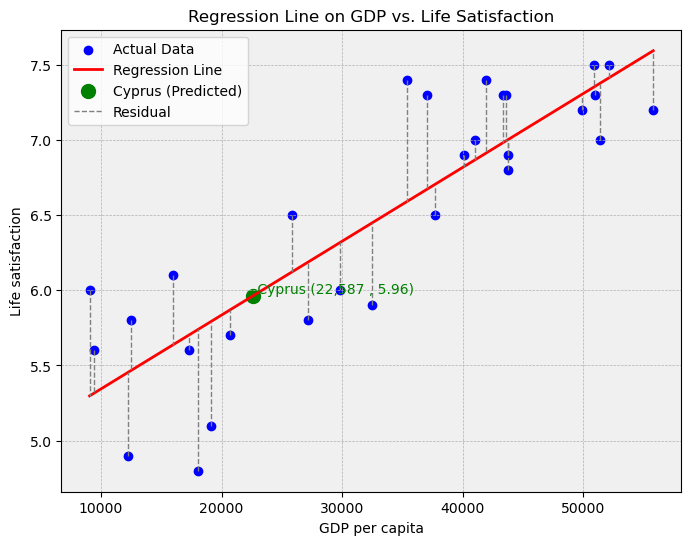

In [16]:
# Visualize the data with regression line and customizations
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of actual data
ax.scatter(country_stats["GDP per capita"], country_stats["Life satisfaction"], label="Actual Data", color="blue")

# Create a range of GDP per capita values (for plotting the regression line)
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Predict the corresponding Life satisfaction values using the trained model
y_pred = model.predict(x_range)

# Plot the regression line
ax.plot(x_range, y_pred, color='red', linewidth=2, label="Regression Line")

# Add the point for Cyprus
x_new = [[22587]]  # Cyprus' GDP per capita
y_new = model.predict(x_new)  # Predicted life satisfaction for Cyprus
ax.scatter(x_new, y_new, color='green', s=100, label="Cyprus (Predicted)")
ax.text(x_new[0][0], y_new[0][0], ' Cyprus (22,587 , 5.96)', fontsize=10, color='green', ha='left', va='bottom')

# Add residuals as dashed lines
for i, (actual, predicted) in enumerate(zip(y, model.predict(x))):
    ax.plot([x[i][0], x[i][0]], [actual, predicted], color="gray", linestyle="--", linewidth=1, label="Residual" if i == 0 else "")

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set background color to gray
ax.set_facecolor("#f0f0f0")

# Add labels and title
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Life satisfaction")
ax.set_title("Regression Line on GDP vs. Life Satisfaction")

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('customized_plot.png')
plt.show()

#### **Conclusion**

* The prediction indicates that for a country with a GDP per capita of **<font color = 'blue'>22,587</font>**, the model estimates a life satisfaction score of about **<font color = 'blue'>5.96</font>**.
* This demonstrates that the linear regression model can generalize its learned relationship to make predictions for unseen GDP values.

### **K-means Clustering based on Life Satisfication & GDP**

* The k-means clustering is to **identify countries with similar social and economic characteristics**, enabling governments or international organizations to develop targeted policies or strategies for different types of countries.

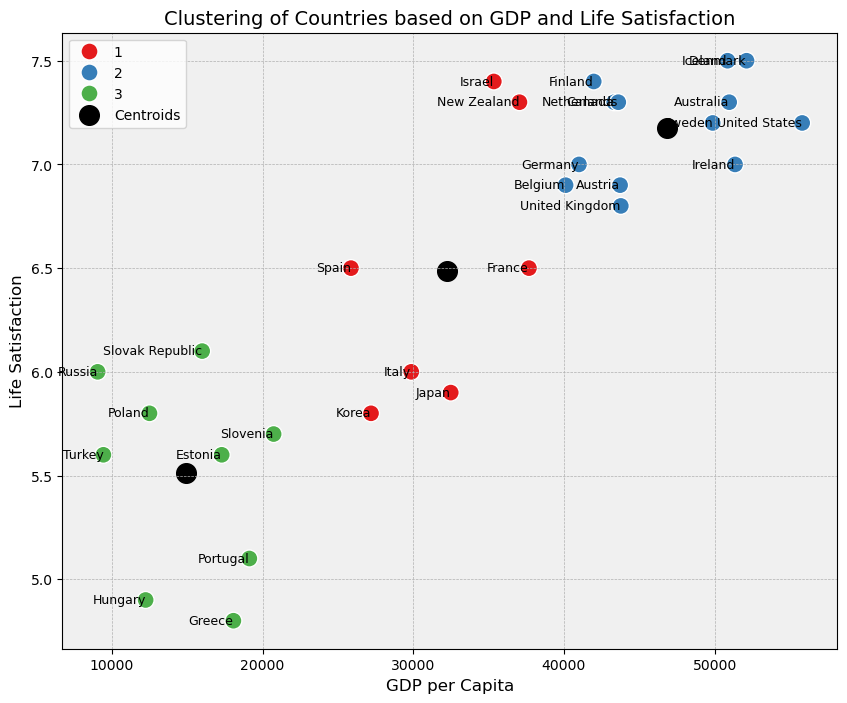

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = country_stats[["GDP per capita", "Life satisfaction"]].values

# Train K-means model (n=3)
kmeans = KMeans(n_clusters=3, random_state=42)
country_stats["Cluster"] = kmeans.fit_predict(X) + 1  # Shift cluster labels to start from 1

# Visualization
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor("#f0f0f0")  # Set background color
sns.scatterplot(
    x=country_stats["GDP per capita"],
    y=country_stats["Life satisfaction"],
    hue=country_stats["Cluster"],
    palette="Set1",
    s=150,
    legend="full"
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c="black", s=200, label="Centroids"
)

# Add country label
for index, row in country_stats.iterrows():
    plt.text(
        row["GDP per capita"],  
        row["Life satisfaction"],  
        index,  
        fontsize=9,
        ha='right',  
        va='center'
    )

# Customization
plt.title("Clustering of Countries based on GDP and Life Satisfaction", fontsize=14)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Life Satisfaction", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

#### **Findings**

* Cluster 1: **Moderate** GDP and Life Satisfaction countries. (Some Southern European countries & developed Asian countries)
* Cluster 2: **High** GDP and **high** Life Satisfaction countries (Some Northern European countries & U.S).
* Cluster 3: **Low** GDP and **low** Life Satisfaction countries (e.g., Some Eastern European countries & developing Asian countries)

#### **Appendix**

If we used an **`instance-based learning algorithm`** instead, we would have found that Slovenia has the closest GDP per capita to that of Cyprus ($20,732), and since the OECD data tells us that Slovenians’ life satisfaction is 5.7, we would have predicted a life satisfaction of **<font color = 'blue'>5.7</font>** for Cyprus.

In [25]:
import sklearn.neighbors
model_2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_2.fit(x, y)
print(model_2.predict(x_new)) # outputs 5.76666667

[[5.76666667]]
